In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data= pd.read_csv(r'D:\paper\indian_liver_patient.csv')

In [5]:
data.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [5]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.000000,58.0,90.0
Gender,583.0,0.756432,0.429603,0.0,1.0,1.000000,1.0,1.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.000000,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.300000,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.000000,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.000000,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.000000,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.600000,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.100000,3.8,5.5
Albumin_and_Globulin_Ratio,583.0,0.947064,0.318492,0.3,0.7,0.947064,1.1,2.8


In [8]:
# replacing missing values with mean
data.Albumin_and_Globulin_Ratio.fillna(data.Albumin_and_Globulin_Ratio.mean(), inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [10]:
data['Gender']=data['Gender'].apply(lambda x:1 if x=='Male' else 0)

<AxesSubplot:>

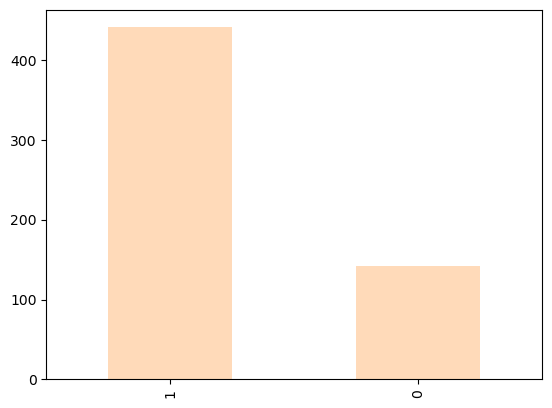

In [11]:
data['Gender'].value_counts().plot.bar(color='peachpuff')

In [6]:
#No liver disease then:=0 for patients having liver disease then:=1
data['Dataset'] = data['Dataset'].map({2:0,1:1})


<AxesSubplot:>

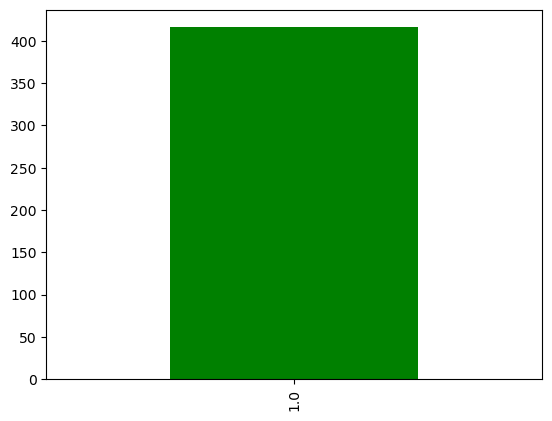

In [7]:
data['Dataset'].value_counts().plot.bar(color='green')

<AxesSubplot:>

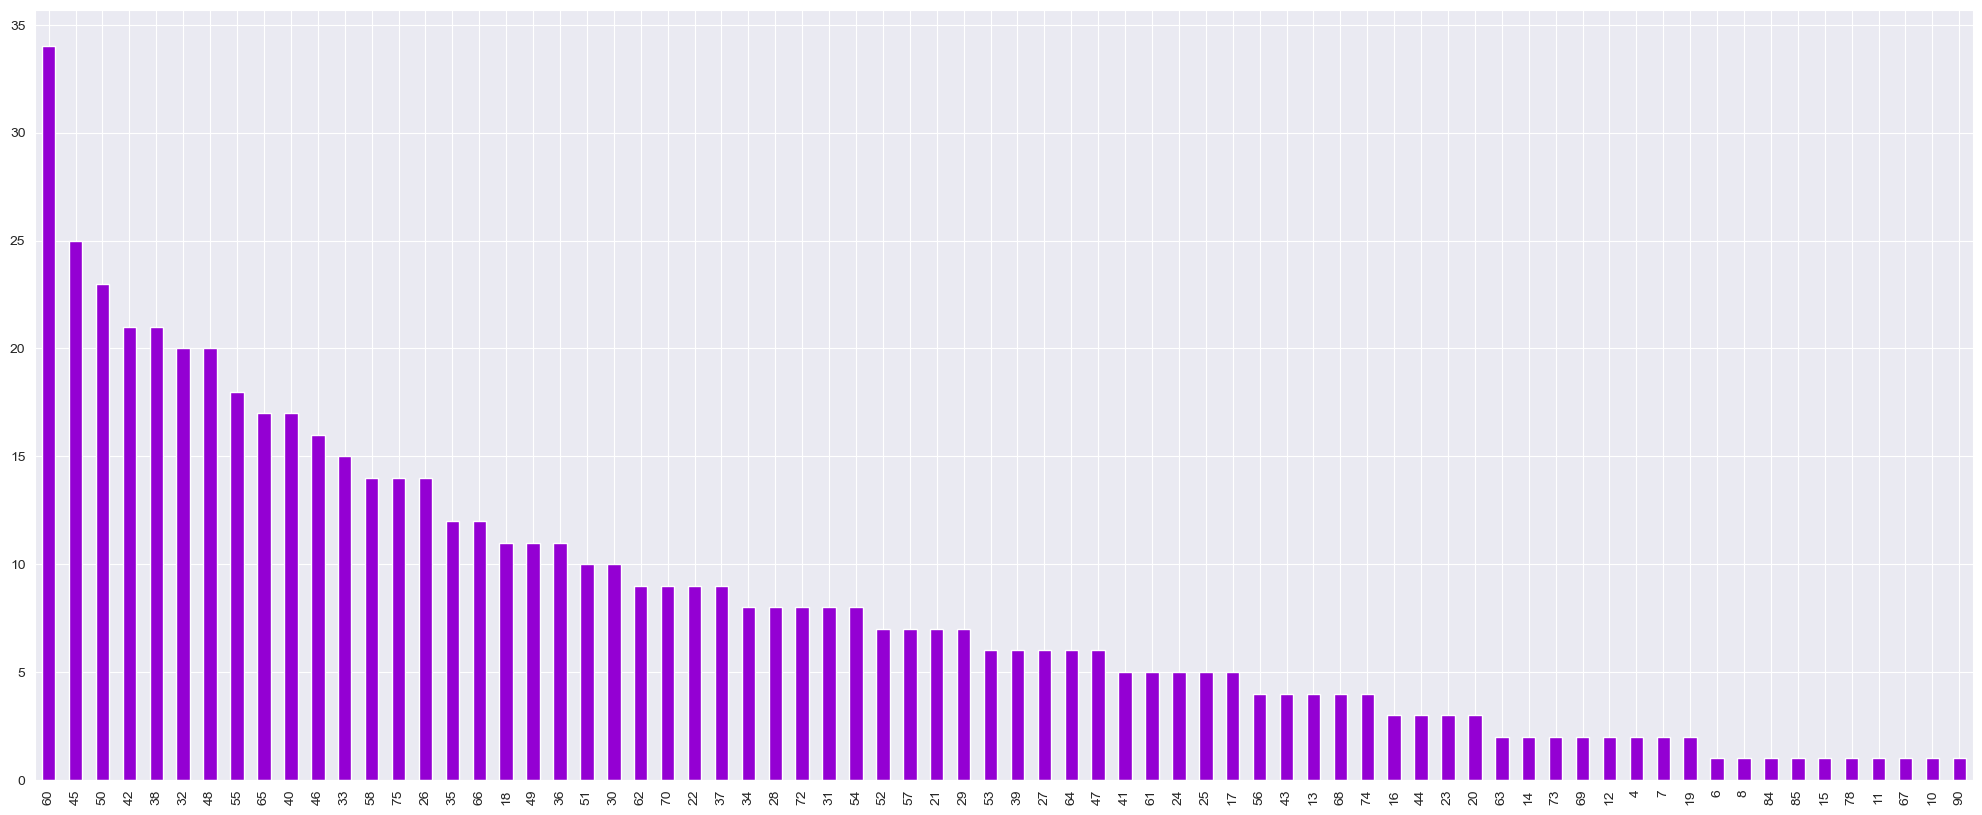

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
data['Age'].value_counts().plot.bar(color='darkviolet')

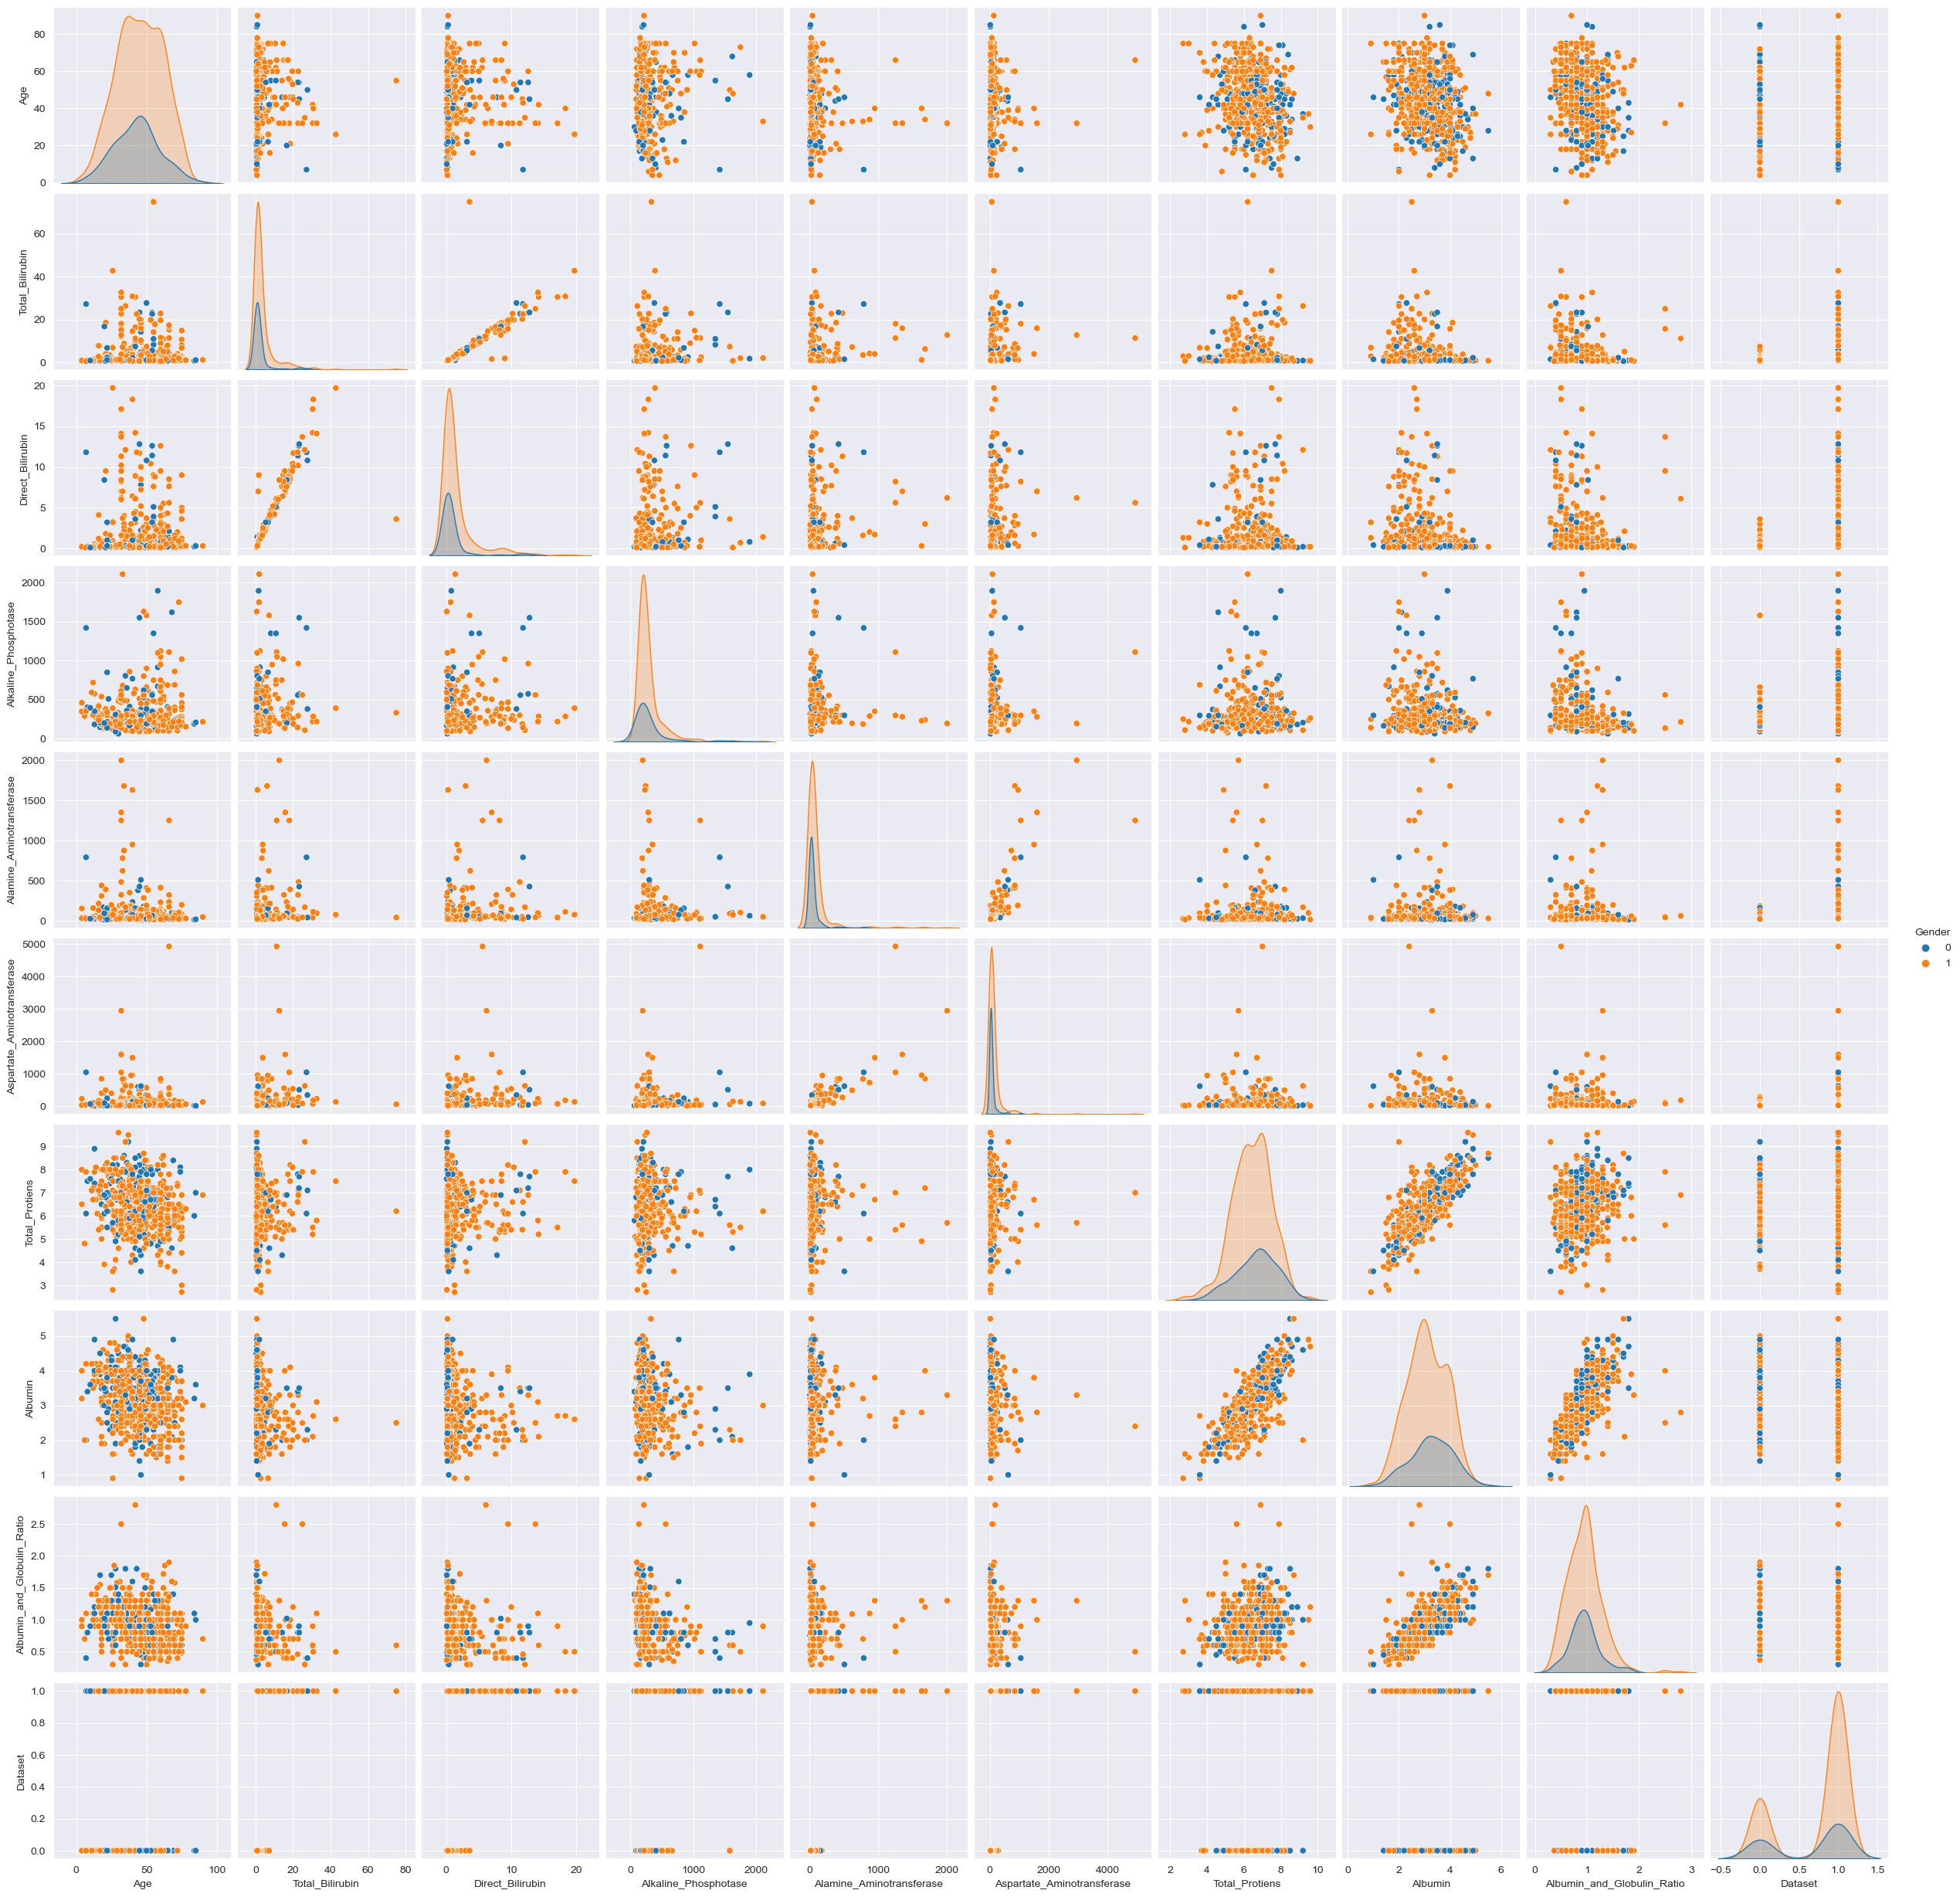

In [15]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(data,hue='Gender')

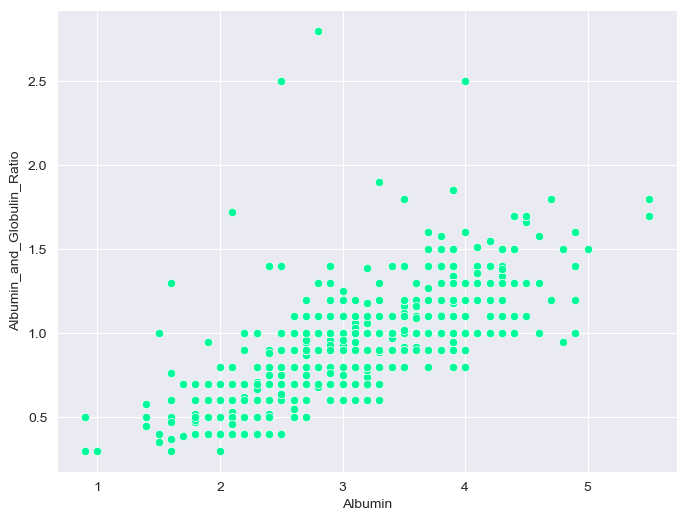

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='mediumspringgreen',data=data);
plt.show()

<AxesSubplot:xlabel='Gender'>

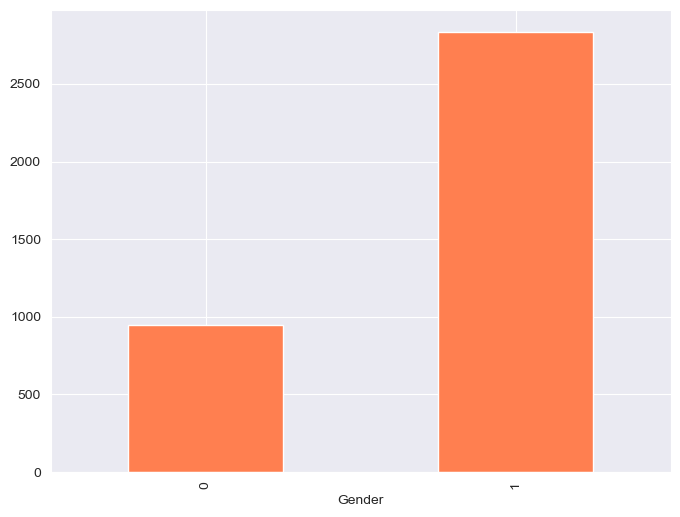

In [17]:
plt.figure(figsize=(8,6))
data.groupby('Gender').sum()["Total_Protiens"].plot.bar(color='coral')

<AxesSubplot:xlabel='Gender'>

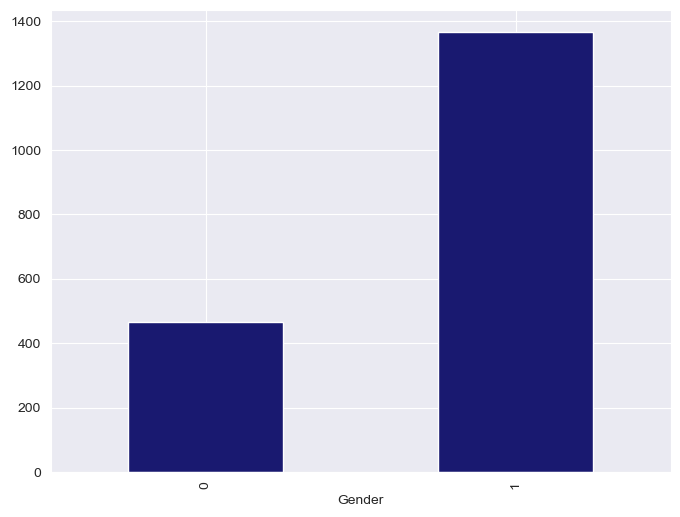

In [18]:
plt.figure(figsize=(8,6))
data.groupby('Gender').sum()['Albumin'].plot.bar(color='midnightblue')

<AxesSubplot:xlabel='Gender'>

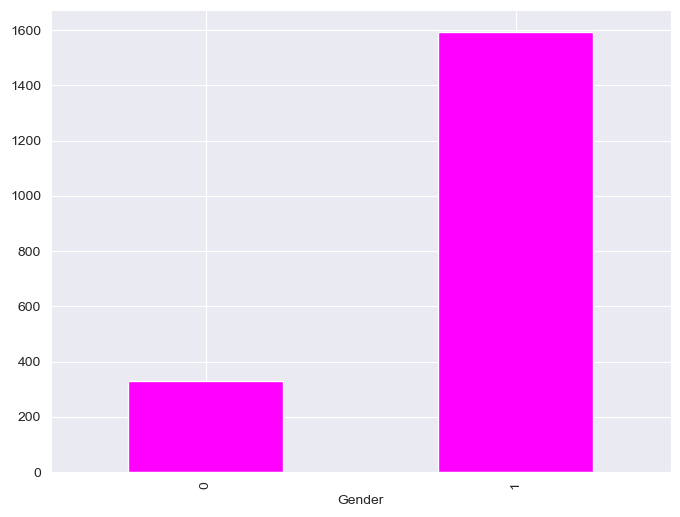

In [19]:
plt.figure(figsize=(8,6))
data.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='fuchsia')

<AxesSubplot:>

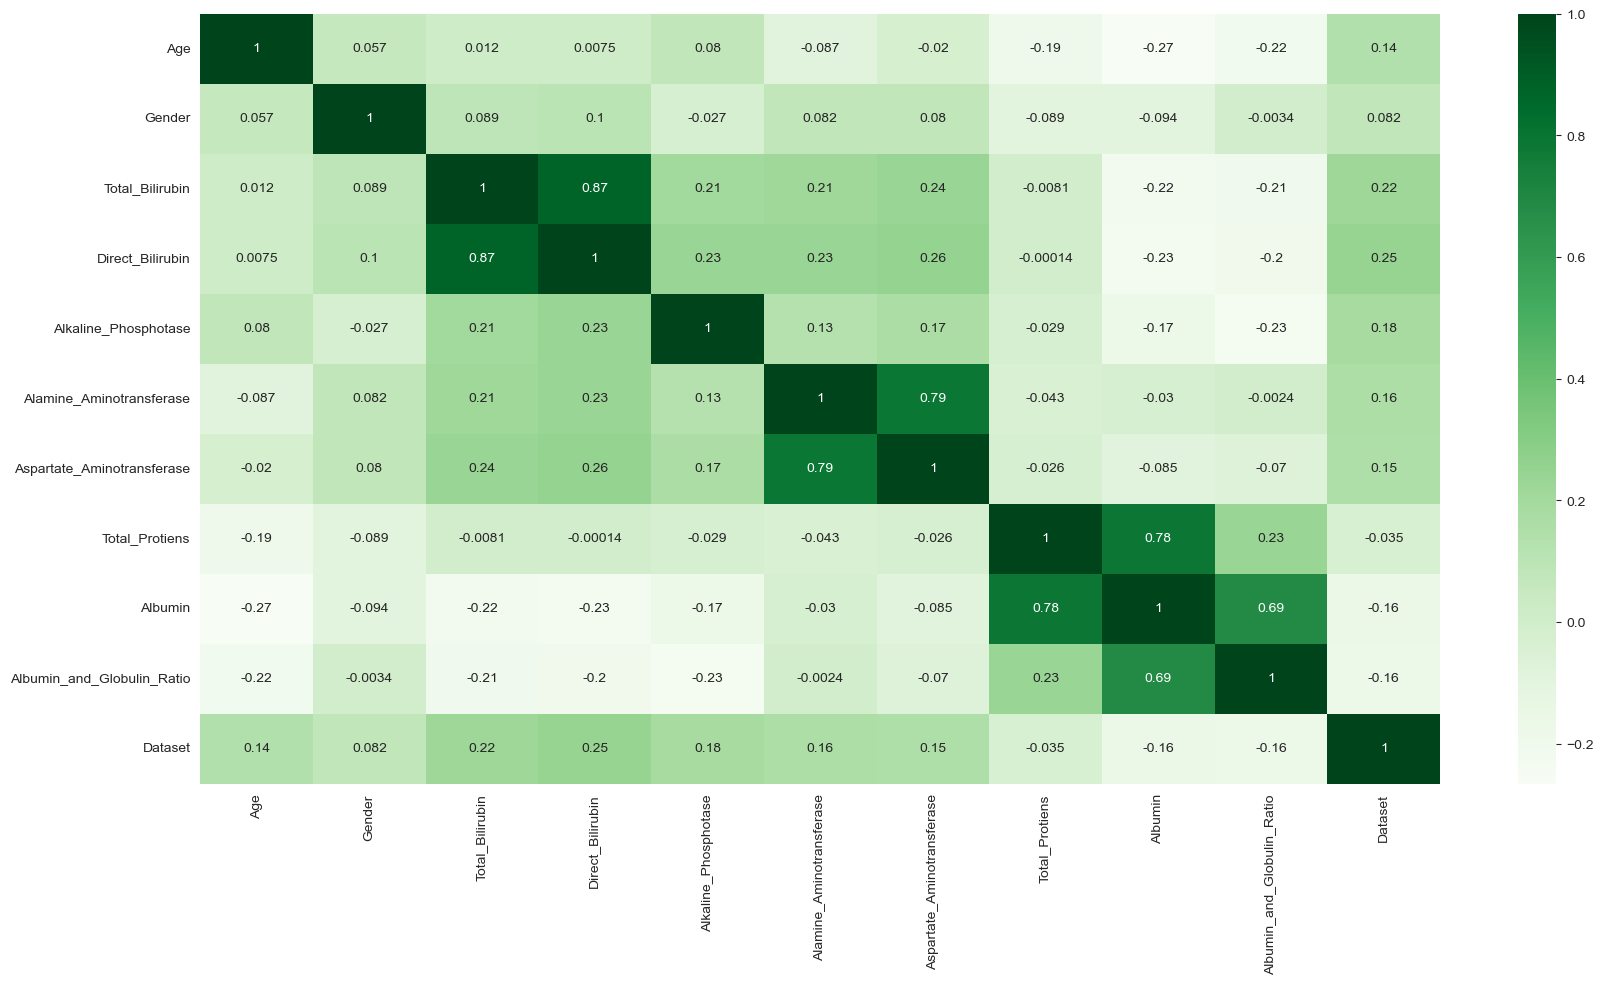

In [20]:
corr=data.corr()
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)

In [22]:
data.to_csv(r'D:\paper\indian_liver_patient.csv',index=False)

In [23]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [24]:
data.iloc()[0:,:-1]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00


In [25]:
X=data.iloc[:,:-1]

y = data['Dataset']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
def score_prediction(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pr = model.predict(X_test)
    acc_score = metrics.accuracy_score(y_test,pr)
    pre_score = metrics.precision_score(y_test,pr)
    
    return acc_score,pre_score

In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
!pip install xgboost
import xgboost as xgb

lg = LogisticRegression(penalty='l1',solver='liblinear')
sv = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bg = BaggingClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = xgb.XGBClassifier(n_estimators=50,random_state=2)


In [29]:
from sklearn import metrics
acc_score = {}
pre_score = {}
clfs= {
    'LogisticRegression':lg,
    'SVM':sv,
    'MNB':mnb,
    'DecisionTreeClassifier':dtc,
    'KNeighborsClassifier':knn,
    'RandomForestClassifier':rfc,
    'ExtraTreesClassifier':etc,
    'AdaBoostClassifier':abc,
    'BaggingClassifier':bg,
    'GradientBoostingClassifier':gbc,
    'XGBClassifier':xgb
}
for name,clf in clfs.items():
    current_score,current_precision = score_prediction(clf,X_train,X_test,y_train,y_test)
   
    acc_score[name]=current_score
    pre_score[name]=current_precision

In [30]:
acc_score

{'LogisticRegression': 0.717948717948718,
 'SVM': 0.7008547008547008,
 'MNB': 0.47863247863247865,
 'DecisionTreeClassifier': 0.6837606837606838,
 'KNeighborsClassifier': 0.717948717948718,
 'RandomForestClassifier': 0.6923076923076923,
 'ExtraTreesClassifier': 0.7435897435897436,
 'AdaBoostClassifier': 0.7692307692307693,
 'BaggingClassifier': 0.717948717948718,
 'GradientBoostingClassifier': 0.717948717948718,
 'XGBClassifier': 0.7521367521367521}

In [31]:
round(np.mean(current_score)*100,2)

75.21